In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/k means clustering

/content/gdrive/My Drive/k means clustering


In [3]:
ls

'case study 1(1).pdf'       gender_classification_v7.csv   README.md
'case study 1.pdf'          k-means-clustering.ipynb
'Copy of driver-data.csv'   LICENSE


In [4]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
import seaborn as s
from sklearn.metrics import accuracy_score

## Importing the Dataset -

In [43]:
#loading the dataset
data=pd.read_csv("gender_classification_v7.csv")


data.head()   #print first five rows

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
data.tail()    #print last five rows

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


## EDA

In [7]:
#statistical measure of the data
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [9]:
print(np.shape(data))

(5001, 8)


> The above analysis tells us that the dataset has 14 columns ans 303 columns and the data types are "int64" and "float64"

In [10]:
print(data.columns) #prints name of the columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [11]:
print(data.isnull().any())  # checking for any null value in the data set

long_hair                    False
forehead_width_cm            False
forehead_height_cm           False
nose_wide                    False
nose_long                    False
lips_thin                    False
distance_nose_to_lip_long    False
gender                       False
dtype: bool


In [12]:
data= data.replace(['Male','Female'],[1, 0])


In [13]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


> result shows there are no null values

In [14]:
#checking on the target variable
data["gender"].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

In [15]:
X=data.drop(["gender"],axis=1)
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [16]:
y=data.gender
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

## Splitting data into train_set and test_set

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#checking the splitted value

print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(1001, 7) (4000, 7) (1001,) (4000,)


### performing some model and training the data set

### Logistic Regression

In [19]:
#choosing a model currently logistic regression

log=LR()
log.fit(x_train,y_train)   #training a model   x_train.T to transpose

print("Test accuracy of training data using Logistic regression: {}".format(log.score(x_train,y_train)*100))
print("Test accuracy of test data usning Logistic regression: {}".format(log.score(x_test,y_test)*100))

Test accuracy of training data using Logistic regression: 96.925
Test accuracy of test data usning Logistic regression: 96.5034965034965


### K nearest neighbour

In [20]:
#k nearest neighbour

knn=KNC(n_neighbors=7)
knn.fit(x_train,y_train)

print("Test accuracy of training data using KNN: {}".format(knn.score(x_train,y_train)*100))
print("Test accuracy of test data using KNN regression: {}".format(knn.score(x_test,y_test)*100))

Test accuracy of training data using KNN: 97.575
Test accuracy of test data using KNN regression: 96.2037962037962


the best accuracy is 97.002997002997 at 12


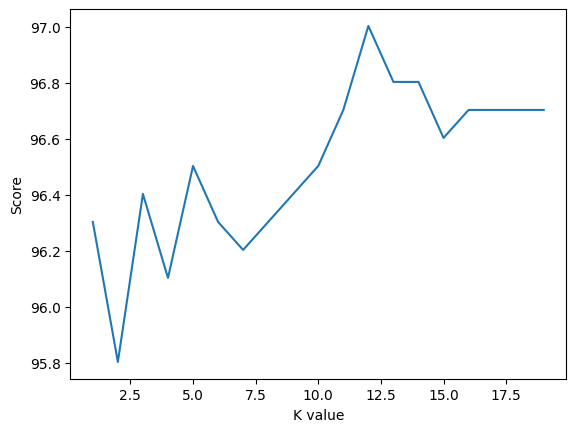

In [21]:
# to get the best accuracy
score=[]
for i in range(1,20):
    knn=KNC(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    score.append(knn.score(x_test,y_test)*100)
print("the best accuracy is",max(score),"at",score.index(max(score))+1)


plt.plot(range(1,20),score
        )
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

<Axes: >

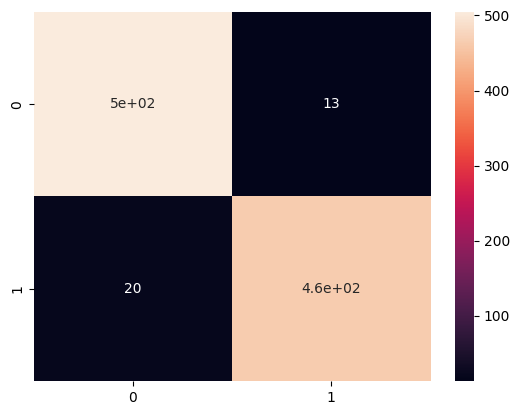

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,knn_predicting)
s.heatmap(cm,annot=True)

### Support Vector machine

In [35]:
# support vector machine algorithm

svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("Test accuracy of training data using SVM: {}".format(svm.score(x_train,y_train)*100))
print("Test accuracy of test data using SVM regression: {}".format(svm.score(x_test,y_test)*100))

Test accuracy of training data using SVM: 97.35000000000001
Test accuracy of test data using SVM regression: 96.6033966033966


### Naive Bayes Algorithm

In [36]:
#naive bayes algo

nb=GNB()
nb.fit(x_train,y_train)
print("Test accuracy of training data using NB: {}".format(nb.score(x_train,y_train)*100))
print("Test accuracy of test data using NB regression: {}".format(nb.score(x_test,y_test)*100))

Test accuracy of training data using NB: 97.275
Test accuracy of test data using NB regression: 96.8031968031968


### Decision Tree Algorithm

In [37]:
# decision tree algo

dtc=DTC()
dtc.fit(x_train,y_train)
print("Test accuracy of training data using DTC regression: {}".format(dtc.score(x_train,y_train)*100))
print("Test accuracy of test data using DTC regression: {}".format(dtc.score(x_test,y_test)*100))

Test accuracy of training data using DTC regression: 99.925
Test accuracy of test data using DTC regression: 96.00399600399601


### Random Forest algorithm

In [38]:
# random forest algorithm

rf=RFC(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)
print("Test accuracy of training data using RFC regression: {}".format(rf.score(x_train,y_train)*100))
print("Test accuracy of test data using RFC regression: {}".format(rf.score(x_test,y_test)*100))

Test accuracy of training data using RFC regression: 99.925
Test accuracy of test data using RFC regression: 96.30369630369631


In [39]:
methods=["LR","KNN","SVM","NB","DTC","RFC"]
accuracy=[log.score(x_test,y_test)*100,knn.score(x_test,y_test)*100,svm.score(x_test,y_test)*100,nb.score(x_test,y_test)*100,dtc.score(x_test,y_test)*100,rf.score(x_test,y_test)*100]
colors=["purple","green","blue","orange","magenta","#CFC60E","#0FBBAE"]

<Axes: xlabel='methods', ylabel='accuracy'>

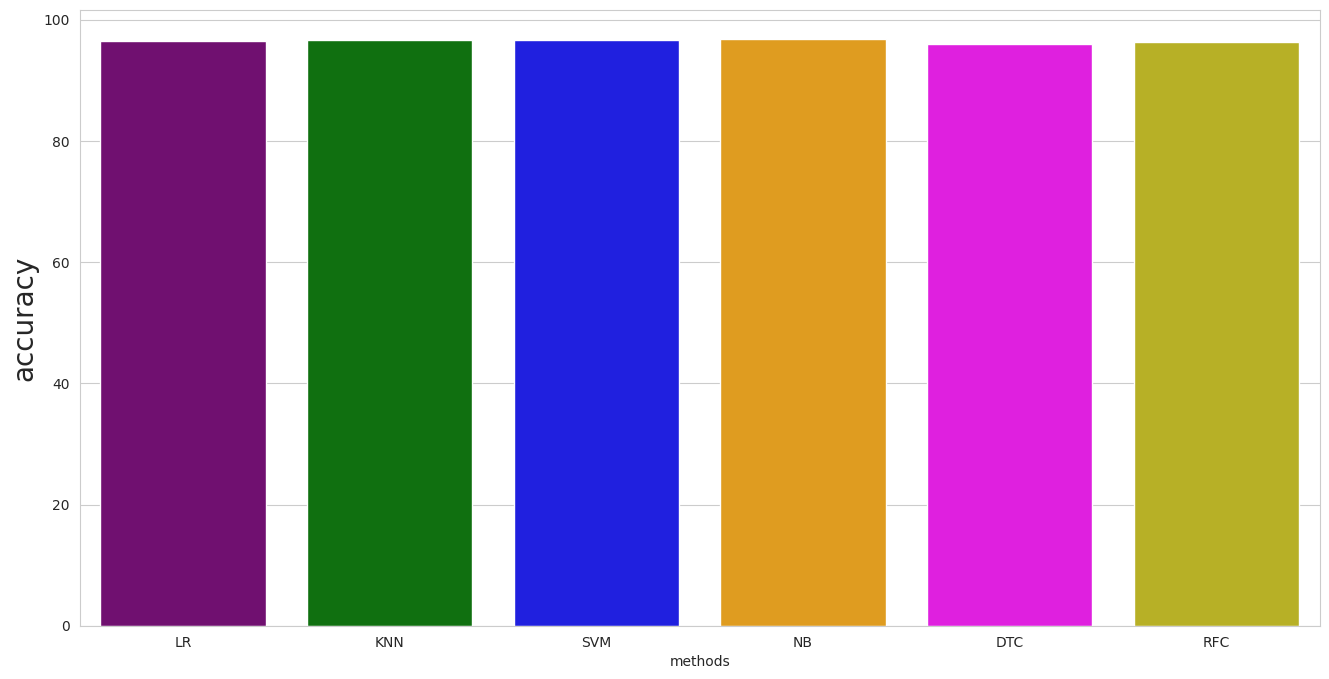

In [40]:
s.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("accuracy",size=20)
plt.xlabel("methods")
s.barplot(x=methods,y=accuracy,palette=colors)

### Applying KNN to predict the output

In [24]:
knn_predicting=knn.predict(x_test)
print("y true :",y_test[:10].values)
print("y predict :",knn_predicting[:10])

y true : [0 1 1 0 0 0 0 1 0 0]
y predict : [0 1 1 0 0 0 0 1 0 0]
